In [1]:

from __future__ import division
from __future__ import print_function  

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

import warnings
import pandas as pd
import gsp_support as gsp
import matplotlib.pyplot as plt
import numpy as np
pd.options.plotting.backend = "plotly"
import datetime

from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
input_folder = 'FINAL/Disaggregation/stage2_filter/'
total = pd.read_csv(input_folder+'3 min disaggregated result FINAL with removed meters.csv')
total['x_Timestamp'] = pd.to_datetime(total['x_Timestamp'])
total = total.set_index('x_Timestamp')

In [3]:
total

,gsp,power,current,compressor,final_compressor,ac_power,ac_on,voltage,meter,m-y
x_Timestamp,,,,,,,,,,
2019-05-09 00:00:00,0.0,3440.0,14.74,0,1,1328.598375,1,233.66,MH24,2019-05
2019-05-09 00:03:00,0.0,2440.0,10.20,0,1,2051.372306,1,238.77,MH24,2019-05
2019-05-09 00:06:00,0.0,2420.0,10.17,0,1,2031.372306,1,239.08,MH24,2019-05
2019-05-09 00:09:00,0.0,2420.0,10.20,0,1,2031.372306,1,238.73,MH24,2019-05
2019-05-09 00:12:00,0.0,2380.0,10.00,0,1,1991.372306,1,237.68,MH24,2019-05
...,...,...,...,...,...,...,...,...,...,...
2020-11-29 23:45:00,0.0,0.0,0.00,0,0,0.000000,0,151.98,MH21,2020-11
2020-11-29 23:48:00,0.0,0.0,0.00,0,0,0.000000,0,151.71,MH21,2020-11
2020-11-29 23:51:00,0.0,0.0,0.00,0,0,0.000000,0,151.88,MH21,2020-11


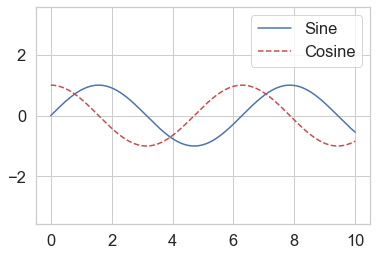

In [12]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

In [33]:
def plot(gsp_result, meter, start_date):
    folder = 'paper plots/'


    gsp = gsp_result['gsp']
    df = gsp_result['current']
    start_date = str(start_date)
    fig, ax = plt.subplots()
    
    
    fig.set_size_inches(12, 10)

    
    date_form = DateFormatter("%I %p")
    ax.xaxis.set_major_formatter(date_form)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=4))
    
  
    
    
    ax.plot(df.index.values, df.values, '-',color='blue', label='Total Signal',linewidth=1)
    
    ax.plot(gsp.index.values, gsp.values, '--r', label='Disaggregated AC Signal',linewidth=2)
    
    leg = ax.legend();
    ax.yaxis.set_label_text('Current (Ampere)')
    ax.xaxis.set_label_text('Time')
    
    fig.savefig(folder + meter +'_'+ str(start_date)+'.png', dpi=400)



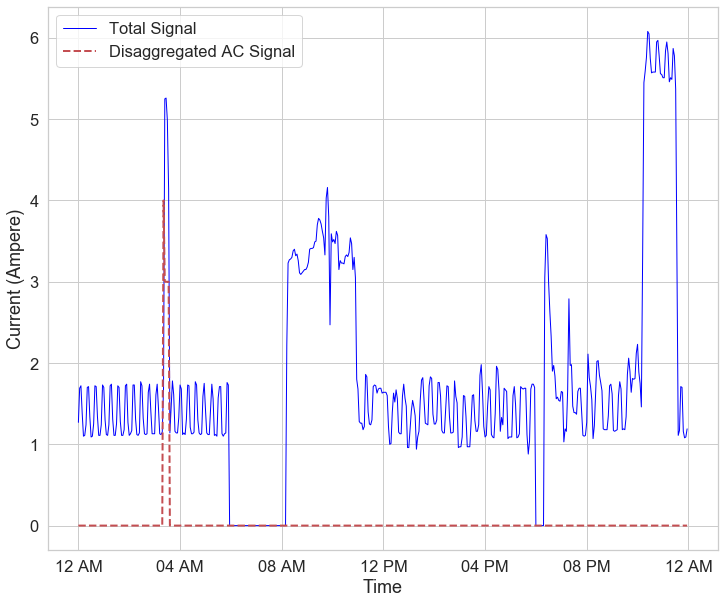

In [35]:
meter = 'MH36'
csv = total.loc[total['meter']==meter]
start_date = datetime.date(2020,10,5) 
csv = csv.loc[csv.index.date==start_date]
plot(csv, meter, start_date)
  
    

In [42]:
str(start_date)

'2019-05-01'

In [25]:
total['date'] = total.index.date

In [30]:
total.index.month

Int64Index([ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
            ...
            11, 11, 11, 11, 11, 11, 11, 11, 11, 11],
           dtype='int64', name='x_Timestamp', length=4493825)

In [34]:
datetime.date(2016,3,1)

datetime.date(2016, 3, 1)

In [47]:
DateFormatter()

TypeError: __init__() missing 1 required positional argument: 'fmt'

NameError: name 'copy' is not defined